In [1]:
# Warmup #1: answer these Q's about dictionaries

# keys can be what type? :   must be immutable type
# values can be what type? :  any type

# indexing with ints.... NO 
# slicing? ..... NO 
# mutable?......YES

In [3]:
# Warmup #2a: Process the age data from the 'amfam_survey_data.csv'
import csv

# source:  Automate the Boring Stuff with Python
def process_csv(filename):
    exampleFile = open(filename, encoding="utf-8")  
    exampleReader = csv.reader(exampleFile) 
    exampleData = list(exampleReader)        
    exampleFile.close()  
    return exampleData

survey_data = process_csv('amfam_survey_data.csv')

In [6]:
# Warmup 2b: get the header and the rows
header = survey_data[0]
rows = survey_data[1:]
header

['pizza topping',
 'state',
 'years',
 'sleep preference',
 'month',
 'pets',
 'lat-long']

In [7]:
# show the first 3 rows
rows[:3]

[['mushroom',
  'Florida',
  '7',
  'early bird',
  'March',
  '',
  '30.263214888389417, -81.54792098150529'],
 ['pineapple',
  'Wisconsin',
  '4',
  'night owl',
  'April',
  'other',
  '43.1581437, -89.2921125'],
 ['sausage',
  'Wisconsin',
  '10',
  'early bird',
  'July',
  'other',
  '43.15645, -89.28814']]

In [8]:
# The cell function will also be useful
# It returns the cell at row_idx with col_name as the appropriate type.
# If there is nothing in the cell, it returns None.
def cell(row_idx, col_name):
    col_idx = header.index(col_name)
    val = rows[row_idx][col_idx]
    if val == "":
        return None
    elif col_name in ["years"]:  # used 'in' to allow for easy modification
        return float(val)
    else:
        return val
print(cell(2,'years'))

10.0


In [9]:
header

['pizza topping',
 'state',
 'years',
 'sleep preference',
 'month',
 'pets',
 'lat-long']

In [14]:
# Warmup 3: Make a dictionary of frequency of 'state'
# change all instances of WI to Wisconsin and TX to Texas

state_dict = {}

for idx in range(len(rows)):
    key = cell(idx, 'state')
    if key == "WI" or key == "madison":
        key = "Wisconsin"
    elif key == "FL":
        key = "Florida" 
    elif key == "TX":
        key = "Texas" 
        
    if key not in state_dict:
        state_dict[key] = 1
    else:
        state_dict[key] += 1 # takes old value, adds 1, becomes new value
state_dict


{'Florida': 7,
 'Wisconsin': 19,
 'Minnesota': 1,
 'New Jersey': 1,
 'Rhode Island': 1,
 'Texas': 3}

## Lecture 18: Combining Dictionaries and Lists

Learning Objectives:
 - Handle key errors with get and pop using default values
 - Understand the idea of nesting data structures
 - Use a dictionary of lists to put rows of data into "buckets"
 - Use a list of dictionaries to represent a table of data.
 - Create a dictionary of dictionaries



### What errors that can occur with get and pop?

In [17]:
suffix = {1:"st", 2:'nd', 3:"rd"}


# what happens when you try to get a key that is not there? 
# try it
print(suffix.get(2))
print(suffix.get(10, "th"))

# what happens whey you try to pop a key that is not there?
suffix.pop(7)

nd
th


KeyError: 7

In [19]:
# How to fix it....add a 2nd argument that is the default

# get(key, default value) 
print(suffix.get(3, 'th'))
print(suffix.get(5, 'th')) #default value, but does not add the key

# pop(key, default value)
print(suffix.pop(7, 'th'))
print(suffix.pop(2, 'th'))
print(suffix)


rd
th
th
nd
{1: 'st', 3: 'rd'}


## What is Nesting? 


In [13]:
# Its a way to put one data structure inside another

## Nesting Part 1

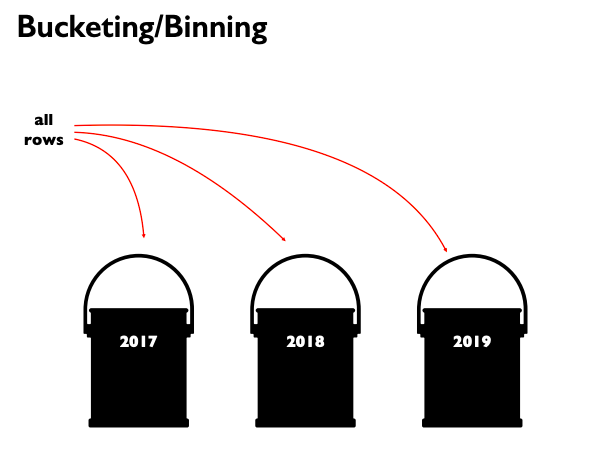



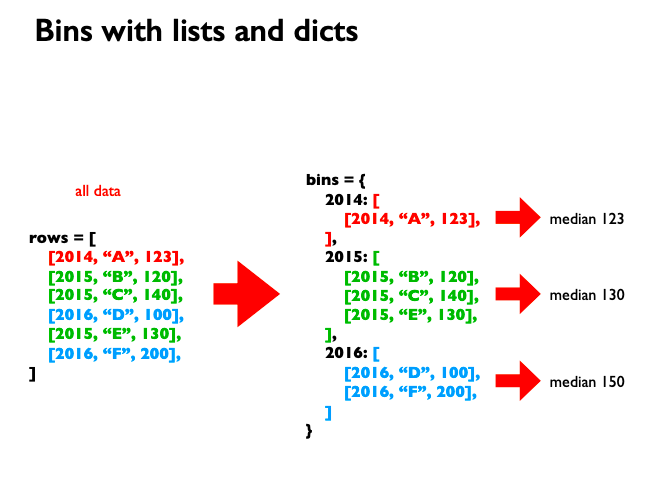

What is it?
 - Start with an empty Dictionary
 - Read a row
  - Keys are values from one of the colums of the data
  - Each key's associated value is a list of lists
 - Each row of data ends up in some bin

Why bucket data?
 - A way to organize our data, without losing information in the process



In [20]:
# let's take another look at our 'amfam_survey_data.csv'
header


['pizza topping',
 'state',
 'years',
 'sleep preference',
 'month',
 'pets',
 'lat-long']

In [30]:
# Example 1: Place the data into buckets by month
# Key:  name of month
# Value:  a list of each row that goes with that season (list of lists) 
#            skip the lat-long to make it easier to read

month_bins_dict = {}

for idx in range(len(rows)):
    month = cell(idx, 'month')
    topping = cell(idx, 'pizza topping')
    state = cell(idx, 'state')
    years = cell(idx, 'years')
    row_list = [topping, state, years]
    #print(row_list)
    if month not in month_bins_dict:
        month_bins_dict[month] = []
    month_bins_dict[month].append(row_list)
        
month_bins_dict       
print(len(month_bins_dict))
print("October" in month_bins_dict)

12
True


In [36]:
# avg years for May people

may_people = month_bins_dict['April']
may_people
for row in may_people:
    years = row[2]
    print(years)

4.0
10.0
20.0


In [ ]:
# could make a 2nd dictionary where the key is the month
# and the value is the average years


## Nesting part 2: Tables
### Use a list of dictionaries to represent a table of data.

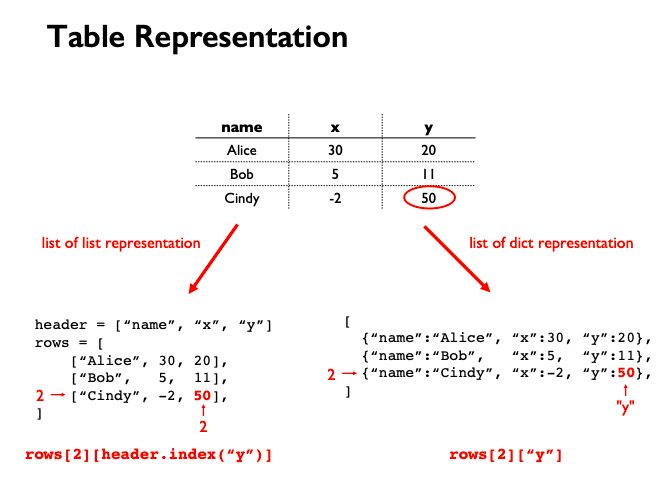
What is it?
 - Start with an empty list
 - Each row of data is one dictionary
  - keys are the column names
  - values are the data in each cell
 - Makes a list of dictionaries

Why put data in table form?
 - It seems redundant, but is used often in Web apps for storing info
 - Its a little easier to access subsets of the data without worrying about the header

In [37]:
# Let's put the student survey data into a list of dictionaries
header

['pizza topping',
 'state',
 'years',
 'sleep preference',
 'month',
 'pets',
 'lat-long']

In [42]:
# Let's make a list of dictionaries, but only store state, years, and pizza

table_dict_list = [] # empty list

for idx in range(len(rows)):
    row = rows[idx]
    one_person_dict = dict()
    for col_name in header:
        one_person_dict[col_name] = cell(idx,col_name)
    table_dict_list.append(one_person_dict)
table_dict_list    

[{'pizza topping': 'mushroom',
  'state': 'Florida',
  'years': 7.0,
  'sleep preference': 'early bird',
  'month': 'March',
  'pets': None,
  'lat-long': '30.263214888389417, -81.54792098150529'},
 {'pizza topping': 'pineapple',
  'state': 'Wisconsin',
  'years': 4.0,
  'sleep preference': 'night owl',
  'month': 'April',
  'pets': 'other',
  'lat-long': '43.1581437, -89.2921125'},
 {'pizza topping': 'sausage',
  'state': 'Wisconsin',
  'years': 10.0,
  'sleep preference': 'early bird',
  'month': 'July',
  'pets': 'other',
  'lat-long': '43.15645, -89.28814'},
 {'pizza topping': 'pepperoni',
  'state': 'WI',
  'years': 7.0,
  'sleep preference': 'no preference',
  'month': 'September',
  'pets': 'dog,cat',
  'lat-long': '43.073051, -89.401230'},
 {'pizza topping': 'mushroom',
  'state': 'madison',
  'years': 7.0,
  'sleep preference': 'early bird',
  'month': 'November',
  'pets': None,
  'lat-long': None},
 {'pizza topping': 'pepperoni',
  'state': 'FL',
  'years': 1.0,
  'sleep pre

In [43]:
# Same thing as above, done without hard-coding, includes all columns
# we did that

## Nesting part 3: Dictionary of Dictionaries 
## Typical of Data used in Web Pages or Mobile Apps

https://www.w3schools.com/python/python_dictionaries_nested.asp

In [50]:
# Nested Dictionary Example:
# add another word to the dictionary
# 

nested_english_dict = {
    "shenanigans": {
        "definition": "silly or high-spirited behavior; mischief.",
        "usage": "widespread financial shenanigans had ruined the fortunes of many",
        "fun_to_say": 7 # on a scale of 1-10
    },
    "bamboozle": {
        "definition": "fool or cheat (someone).",
        "usage": "Tom Sawyer bamboozled the neighborhood boys into painting for him",
        "fun_to_say": 8 # on a scale of 1-10
    },
    "gubbins": {
        "definition": "(objects) of little to no value.",
        "usage": "I cleared all the gubbins off my desk before I started working",
        "fun_to_say": 10 # on a scale of 1-10
    },
    "malarkey": {
        "definition": "meaningless talk; nonsense.",
        "usage": "don't give me that malarkey",
        "fun_to_say": 5 # on a scale of 1-10
    },
    "gnarly": {
        "definition": "gnarled.",
        "usage": "twisted trees and gnarly roots",
        "fun_to_say": 2 # on a scale of 1-10
    }
    
}

# can you add a word? 

In [51]:
# find the usage of 'bamboozle'
nested_english_dict['bamboozle']['usage']

'Tom Sawyer bamboozled the neighborhood boys into painting for him'

In [54]:
# print out all words in the dictionary with a fun_to_say score greater than 7
for word in nested_english_dict:
    print(word, nested_english_dict[word]['fun_to_say'])


shenanigans 7
bamboozle 8
gubbins 10
malarkey 5
gnarly 2
